# Importing Python Packages:

*Installing numpy for linear algebra*

In [109]:
!pip install numpy
import numpy as np


*Installing pandas for data processing*

In [110]:
!pip install pandas
import pandas as pd

*Importing Matplotpib for creating static, interactive, and animated visualizations*

In [111]:
!pip install matplotlib
import matplotlib.pyplot as plt


*Importing Seaborn for creating attractive and informative statistical graphics*

In [112]:
!pip install seaborn
import seaborn as sns

*Sets the Seaborn plot style to a white background with grid lines & displays matplotlib plots directly in the notebook*


In [113]:
sns.set_style("whitegrid")
%matplotlib inline

*Importing Squarify for creating treemaps in Python*

In [114]:
!pip install squarify
import squarify
import os


*Importing folium for geographic data visualization*

In [115]:
!pip install folium
import folium

# Downloading Data:


*Web Scraping*

In [116]:
!pip install requests beautifulsoup4


In [117]:
url = 'https://www.nytimes.com/interactive/2024/dining/best-nyc-restaurants.html'
import requests
page_to_scrape = requests.get(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page_to_scrape.text, 'html.parser')

*Creating Data Frame*

In [118]:
# Extract text from BeautifulSoup objects
restaurant_rankings = [rank.get_text(strip=True)
  for rank in soup.findAll('span', class_='resto-rank svelte-16mfu50')]
restaurant_names = [name.get_text(strip=True)
  for name in soup.findAll('h5', class_='svelte-16mfu50')]
restaurant_neighborhoods = [neigh.get_text(strip=True)
  for neigh in soup.findAll('dd', class_='resto-neighborhood svelte-16mfu50')]
restaurant_cuisines = [cuisine.get_text(strip=True)
  for cuisine in soup.findAll('dd', class_='resto-cuisine svelte-16mfu50')]

# Create a dictionary with the lists
data = {
    'Ranking': restaurant_rankings,
    'Restaurant Name': restaurant_names,
    'Neighborhood': restaurant_neighborhoods,
    'Cuisine': restaurant_cuisines
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame without the index column
print(df.to_string(index=False))


Ranking               Restaurant Name                       Neighborhood                          Cuisine
      1     Tatiana by Kwame Onwuachi                    Upper West Side      American, Caribbean, Creole
      2                        Blanca                           Bushwick           Seasonal, Tasting Menu
      3                  Le Bernardin                            Midtown         French, Seafood, Tasting
      4                        Atomix                              NoMad                  Korean, Tasting
      5                    Via Carota                       West Village                          Italian
      6           La Piraña Lechonera                        South Bronx                     Puerto Rican
      7                         Semma                  Greenwich Village                           Indian
      8            Superiority Burger                       East Village                Diner, Vegetarian
      9                       Yoshino         

#Data Cleaning & Data Information:

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ranking          100 non-null    object
 1   Restaurant Name  100 non-null    object
 2   Neighborhood     100 non-null    object
 3   Cuisine          100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [120]:
df.describe()

,Ranking,Restaurant Name,Neighborhood,Cuisine
count,100,100,100,100
unique,100,100,54,66
top,1,Tatiana by Kwame Onwuachi,Lower East Side,Italian
freq,1,1,7,8


In [121]:
unique_values = df['Cuisine'].unique()
num_unique = len(unique_values)
print(f"Number of distinct values: {num_unique}")

Number of distinct values: 66


In [170]:
# Classify as 'Mixed Cuisines' if there is more than one value separated by commas
def classify_cuisine(cuisine):
    if ',' in cuisine:
        return 'Mixed Cuisines'
    elif cuisine in ['Chinese', 'Vietnamese', 'Korean', 'Japanese','Thai', 'Malaysian']:
        return 'East/ South East Asian'
    elif 'American'in cuisine:
        return 'American'
    else:
        return cuisine

# Create a new column
df['Cuisine Category'] = df['Cuisine'].apply(classify_cuisine)

# Count occurrences of each cuisine category
cuisine_counts = df['Cuisine Category'].value_counts()
df

,Ranking,Restaurant Name,Neighborhood,Cuisine,Cuisine Category,Ranking Category
0,1,Tatiana by Kwame Onwuachi,Upper West Side,"American, Caribbean, Creole",Mixed Cuisines,Top Tier
1,2,Blanca,Bushwick,"Seasonal, Tasting Menu",Mixed Cuisines,Top Tier
2,3,Le Bernardin,Midtown,"French, Seafood, Tasting",Mixed Cuisines,Top Tier
3,4,Atomix,NoMad,"Korean, Tasting",Mixed Cuisines,Top Tier
4,5,Via Carota,West Village,Italian,Italian,Top Tier
...,...,...,...,...,...,...
95,96,Caleta 111,Richmond Hill,Peruvian,Peruvian,Bottom Tier
96,97,Zum Stammtisch,Glendale,German,German,Bottom Tier
97,98,Lakruwana,Stapleton Heights,Sri Lankan,Sri Lankan,Bottom Tier
98,99,Ewe’s Delicious Treats,New Lots,"Nigerian, West African",Mixed Cuisines,Bottom Tier


In [132]:
# Group by 'Neighborhood' and count occurences
neighborhoods_to_filter = ['Lower East Side', 'Midtown', 'Williamsburg', 'East Village', 'Nomad', 'Chelsea', 'Upper West Side', 'Flushing', 'Tribeca', 'Chinatown']
filtered_df = df[df['Neighborhood'].isin(neighborhoods_to_filter)] \
    .groupby('Neighborhood').size().reset_index(name='Count')

In [124]:
# DataFrame with neighborhood, latitude, longitude, and restaurant count
data2 = {
    'Neighborhood': ['Lower East Side', 'Midtown', 'Williamsburg', 'East Village', 'Nomad', 'Chelsea', 'Upper West Side', 'Flushing', 'Tribeca', 'Chinatown'],
    'Latitude': [40.7150, 40.7549, 40.7081, 40.7265, 40.7447, 40.7465, 40.7870, 40.7590, 40.7163, 40.7158],
    'Longitude': [-73.9843, -73.9840, -73.9571, -73.9815, -73.9885, -74.0014, -73.9754, -73.8304, -74.0086, -73.9970],
    'RestaurantCount': [7,5,5,4,4,4,3,3,3,3]
}

df_neigh = pd.DataFrame(data2)

In [163]:
# Categorize restaurants based on their ranking
def categorize_ranking(ranking):
    ranking = int(ranking)
    if ranking <= 10:
        return 'Top Tier'
    elif ranking <= 30:
        return 'Mid Tier'
    elif ranking <= 60:
        return 'Lower Mid Tier'
    else:
        return 'Bottom Tier'

# Apply the function to create a new column with categories
df['Ranking Category'] = df['Ranking'].apply(categorize_ranking)
df

,Ranking,Restaurant Name,Neighborhood,Cuisine,Cuisine_Category,Category,Cuisine Category,Ranking Category
0,1,Tatiana by Kwame Onwuachi,Upper West Side,"American, Caribbean, Creole",Mixed Cuisines,Top Tier,Mixed Cuisines,Top Tier
1,2,Blanca,Bushwick,"Seasonal, Tasting Menu",Mixed Cuisines,Top Tier,Mixed Cuisines,Top Tier
2,3,Le Bernardin,Midtown,"French, Seafood, Tasting",Mixed Cuisines,Top Tier,Mixed Cuisines,Top Tier
3,4,Atomix,NoMad,"Korean, Tasting",Mixed Cuisines,Top Tier,Mixed Cuisines,Top Tier
4,5,Via Carota,West Village,Italian,Italian,Top Tier,Italian,Top Tier
...,...,...,...,...,...,...,...,...
95,96,Caleta 111,Richmond Hill,Peruvian,Peruvian,Bottom Tier,Peruvian,Bottom Tier
96,97,Zum Stammtisch,Glendale,German,German,Bottom Tier,German,Bottom Tier
97,98,Lakruwana,Stapleton Heights,Sri Lankan,Sri Lankan,Bottom Tier,Sri Lankan,Bottom Tier
98,99,Ewe’s Delicious Treats,New Lots,"Nigerian, West African",Mixed Cuisines,Bottom Tier,Mixed Cuisines,Bottom Tier


# Data Visualization

*What are the most popular cuisines among the top-ranked restaurants?*

<ipython-input-160-96f78261918b>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cuisine_counts_combined[cuisine_counts < threshold] = 'Other'


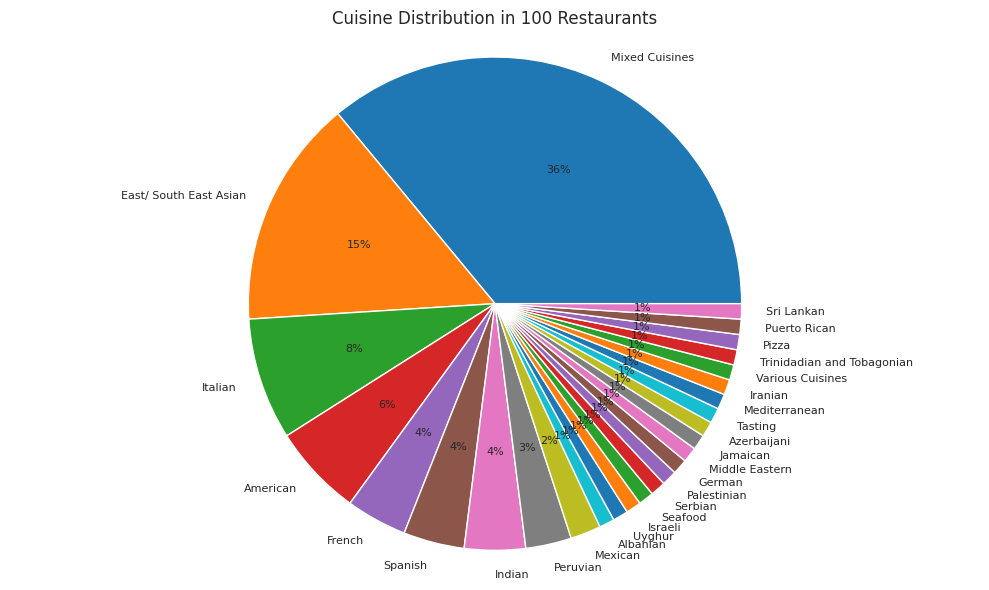

In [160]:
# Normalize counts to represent percentages for a total of 100 restaurants
cuisine_percentages = (cuisine_counts / cuisine_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(cuisine_percentages, labels=cuisine_percentages.index, autopct='%1.0f%%', startangle=0, textprops={'fontsize': 8})
plt.title('Cuisine Distribution in 100 Restaurants')
plt.axis('equal')

# Combine smaller categories into "Other"
threshold = 2
cuisine_counts_combined = cuisine_counts.copy()
cuisine_counts_combined[cuisine_counts < threshold] = 'Other'
cuisine_counts_combined = cuisine_counts_combined.value_counts()

plt.tight_layout()
plt.show()



*What is the average ranking of restaurants for each cuisine? Are some cuisines consistently ranked higher?*

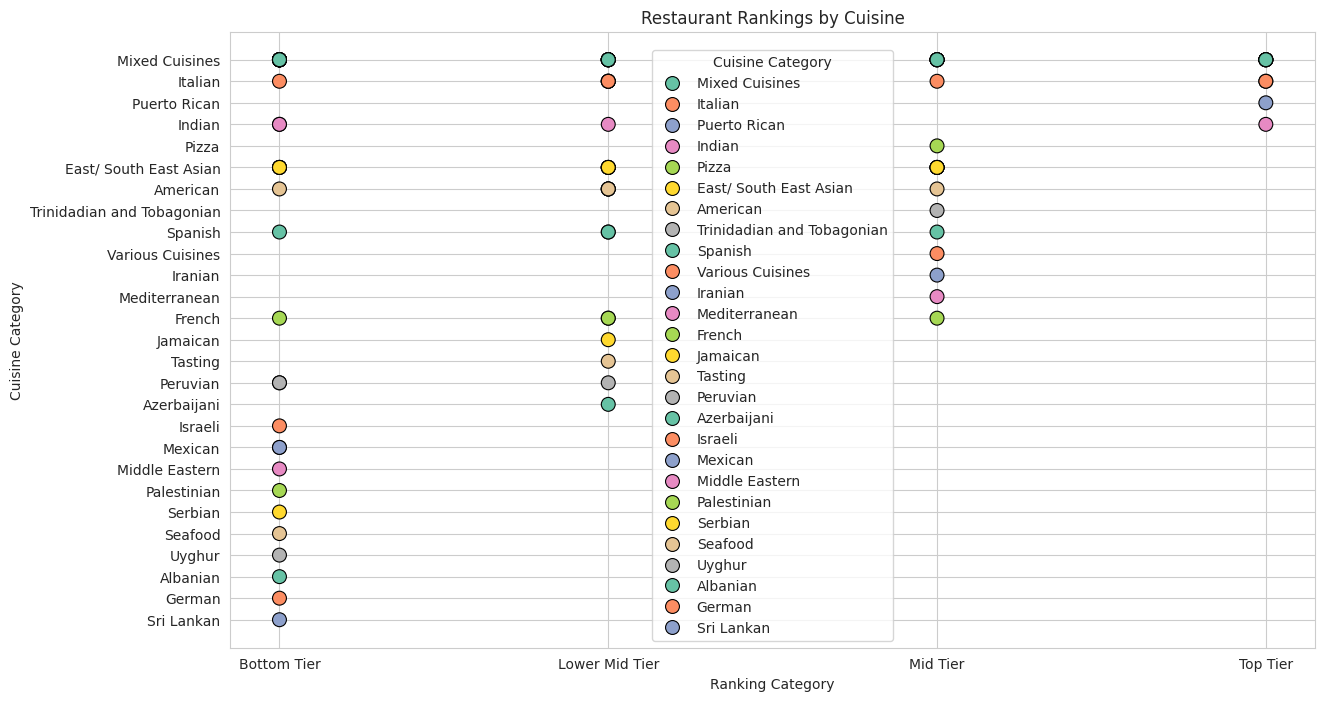

In [162]:
# Create a scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Ranking Category', y='Cuisine Category', hue='Cuisine Category', palette='Set2', s=100, edgecolor='black')

# Customize the plot
plt.title('Restaurant Rankings by Cuisine')
plt.xlabel('Ranking Category')
plt.ylabel('Cuisine Category')
plt.gca().invert_xaxis()
plt.legend(title='Cuisine Category')
plt.grid(True)
plt.show()

*Which neighborhoods in NYC have the highest concentration of top-ranked restaurants?*


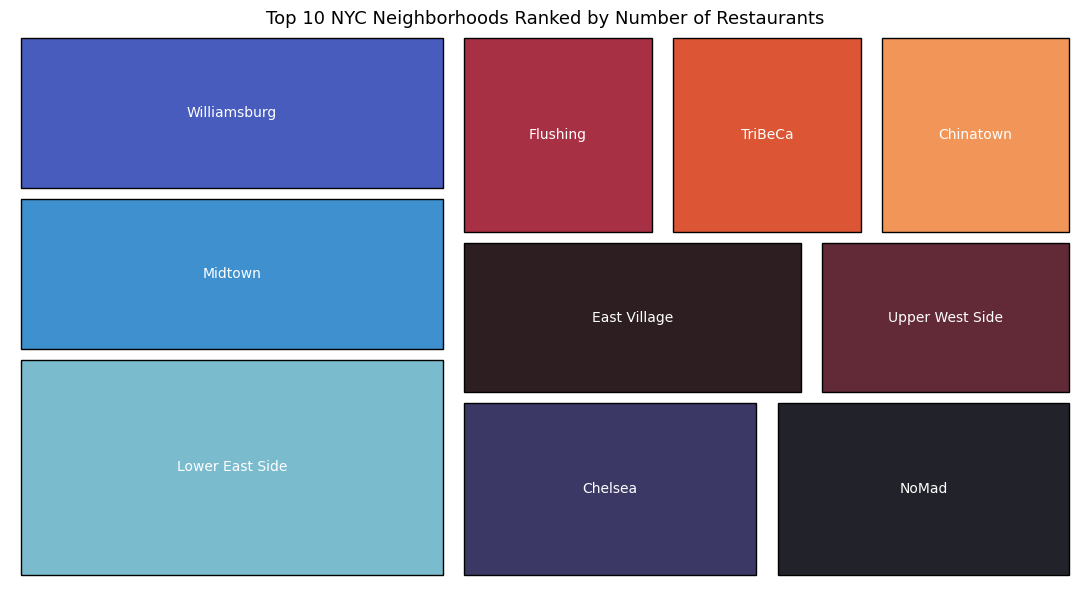

In [126]:
# Group by neighborhood and count occurrences
neighborhood_counts = df['Neighborhood'].value_counts().head(10)

plt.subplots(figsize=(11,6))

# Use neighborhood counts for sizes
axis = squarify.plot(sizes=neighborhood_counts,
                     ec='black',
                     label=neighborhood_counts.index,
                     text_kwargs={'fontsize':10, 'color':'white'},
                     pad = 0.1,
                     color = sns.color_palette("icefire", len(neighborhood_counts)))

axis.set_title("Top 10 NYC Neighborhoods Ranked by Number of Restaurants", fontsize=13, color= 'black')

plt.axis("off")
plt.tight_layout()
plt.show()

In [127]:
# Create the map object
map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add 'New York City' marker
folium.Marker([40.7128, -74.0060], popup="New York City").add_to(map)

# Add markers for each neighborhood with restaurant counts
for idx, row in df_neigh.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Neighborhood']}: {row['RestaurantCount']}",
        icon=folium.Icon(color='pink', icon='cutlery', prefix='fa')
    ).add_to(map)
map

# Uploading to GitHub

In [128]:
from getpass import getpass
import os

# Install Git
!apt-get install git

# Configure Git
os.system('git config --global ptpuyen99')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


256

In [129]:
!git clone https://github.com/ptpuyen99/NYC-Restaurants-2024


fatal: destination path 'NYC-Restaurants-2024' already exists and is not an empty directory.
